Best max_depth: 12
Train R^2: 0.49997720928805134
Test R^2: 0.371067454523512
Test MSE: 200.64461210858187


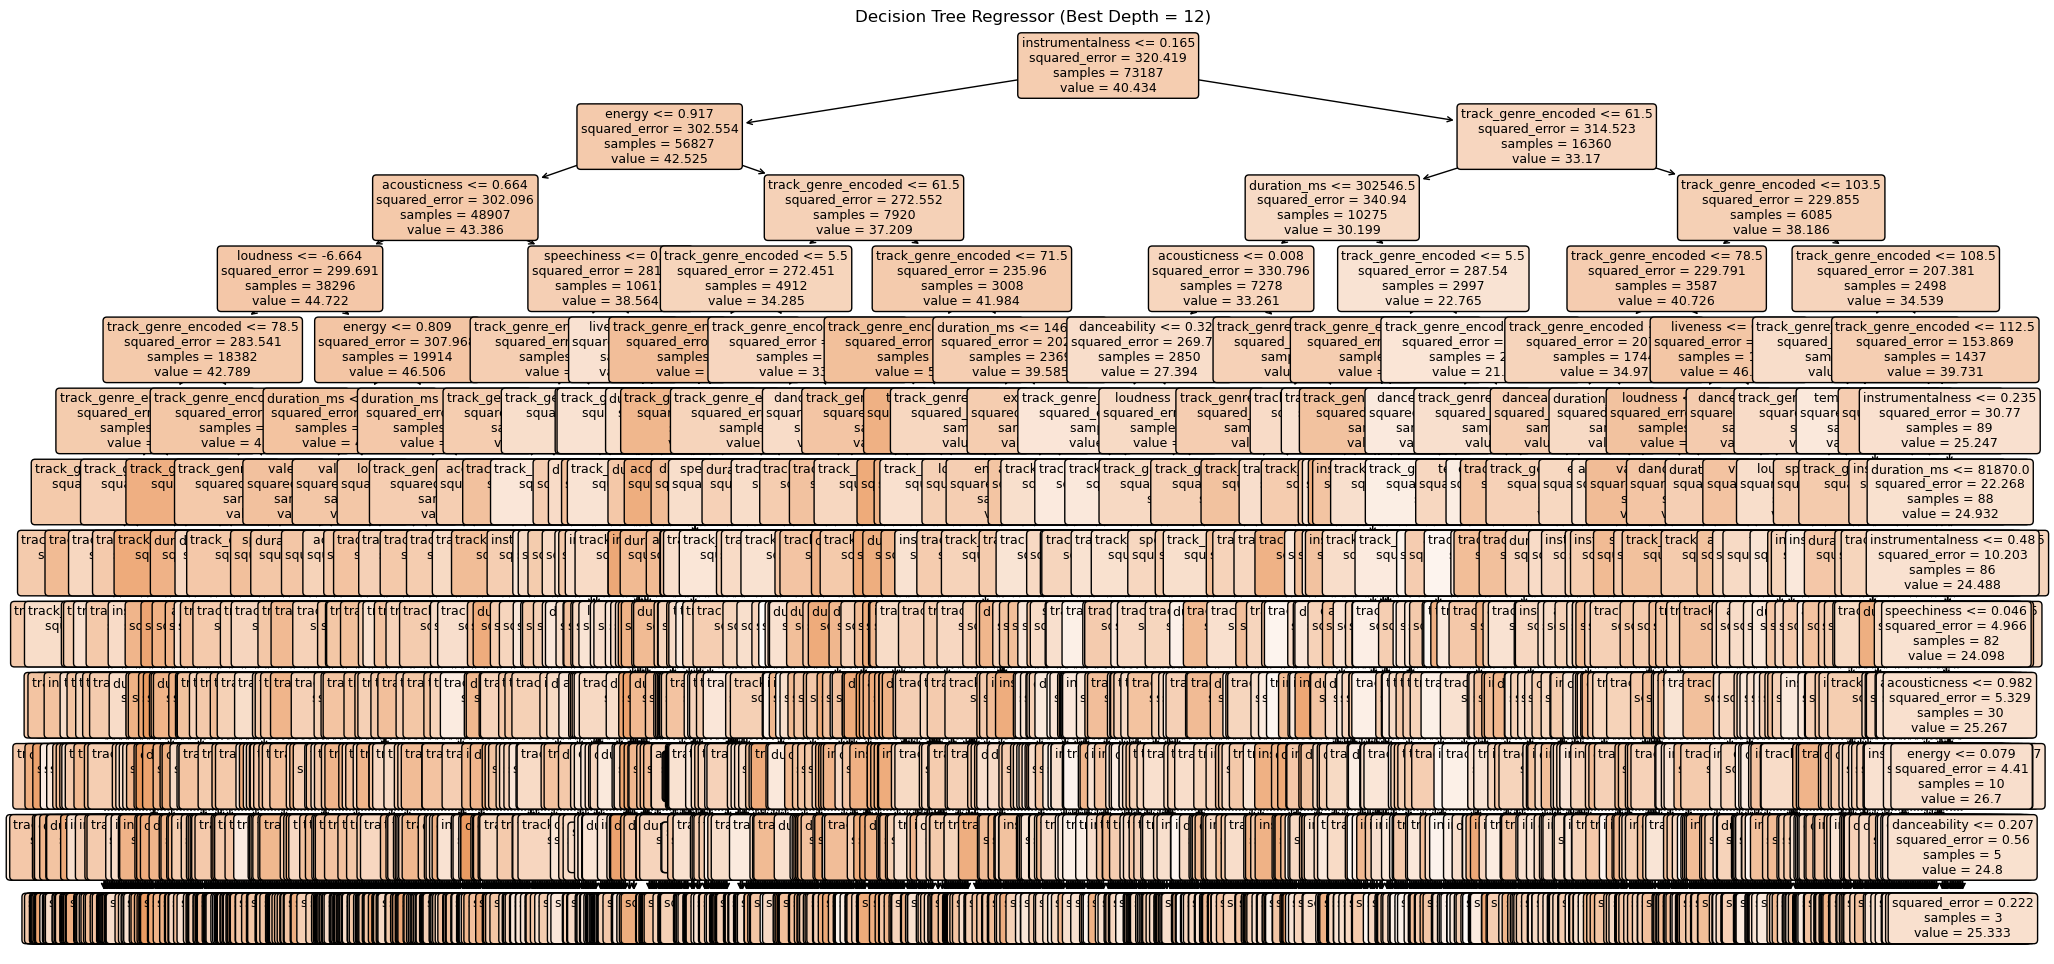

In [ ]:
# Regular Decision Tree

import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned_Dataset.csv")

# Converts explicit from boolean to int
df['explicit'] = df['explicit'].astype(int)

# Encode track_genre
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded'
]

X = df[features]
y = df['popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for best max_depth
param_grid = {'max_depth': [9, 10, 12, 15, 20]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_tree = grid_search.best_estimator_

# Predictions
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

plt.figure(figsize=(24, 12))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=9)
plt.title(f"Decision Tree Regressor (Best Depth = {grid_search.best_params_['max_depth']})")
plt.show()

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 20}
Train R^2: 0.631856434020791
Test R^2: 0.48269505964643544
Test MSE: 165.03272067190912


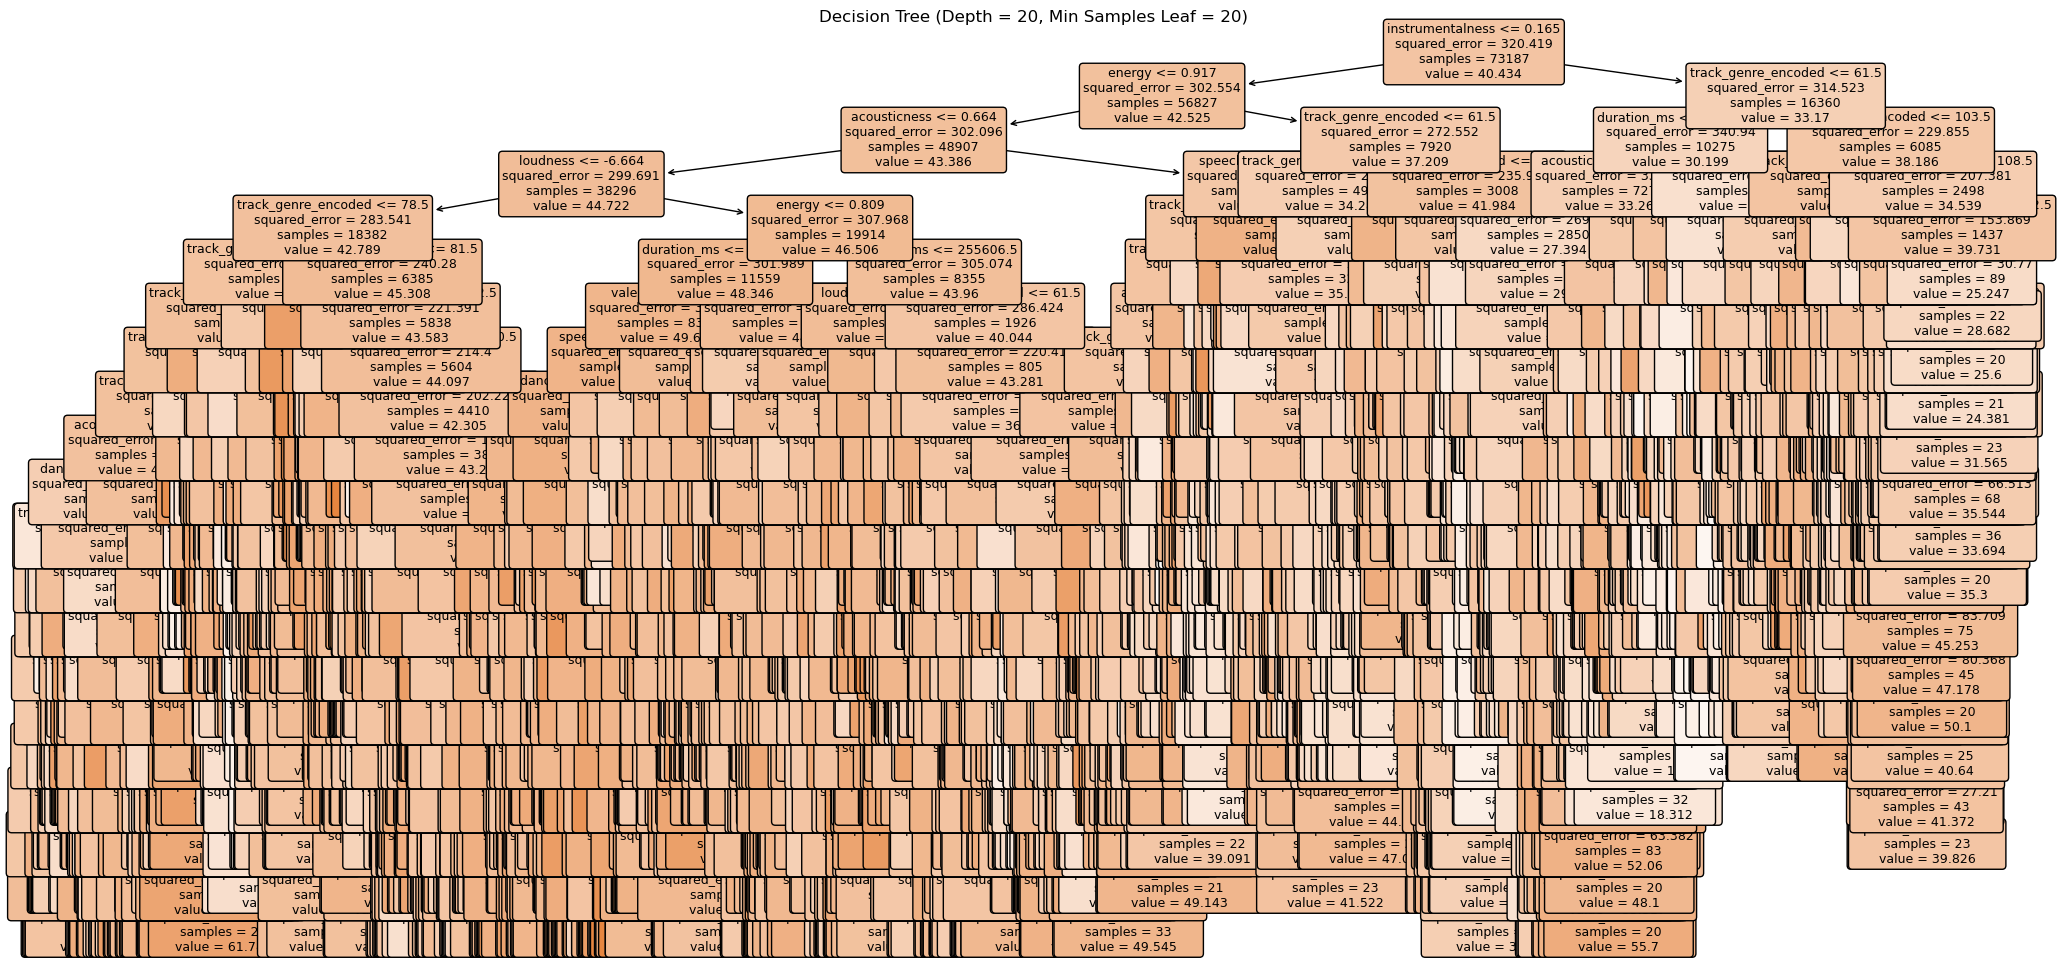

In [ ]:
# Decision Tree with min_samples_leaf to control overfitting

import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned_Dataset.csv")

# Convert explicit from boolean to int
df['explicit'] = df['explicit'].astype(int)

# Encode track_genre
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded'
]

X = df[features]
y = df['popularity']

# Use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for best (max_depth, min_samples_leaf)
param_grid = {
    'max_depth': [12, 15, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

# Predictions
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

plt.figure(figsize=(24, 12))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=9)
plt.title(f"Decision Tree (Depth = {grid_search.best_params_['max_depth']}, "
          f"Min Samples Leaf = {grid_search.best_params_['min_samples_leaf']})")
plt.show()

Best Parameters: {'ccp_alpha': 0.02, 'max_depth': 25}
Train R^2: 0.6902787051455874
Test R^2: 0.4734027852177384
Test MSE: 167.99717975700847


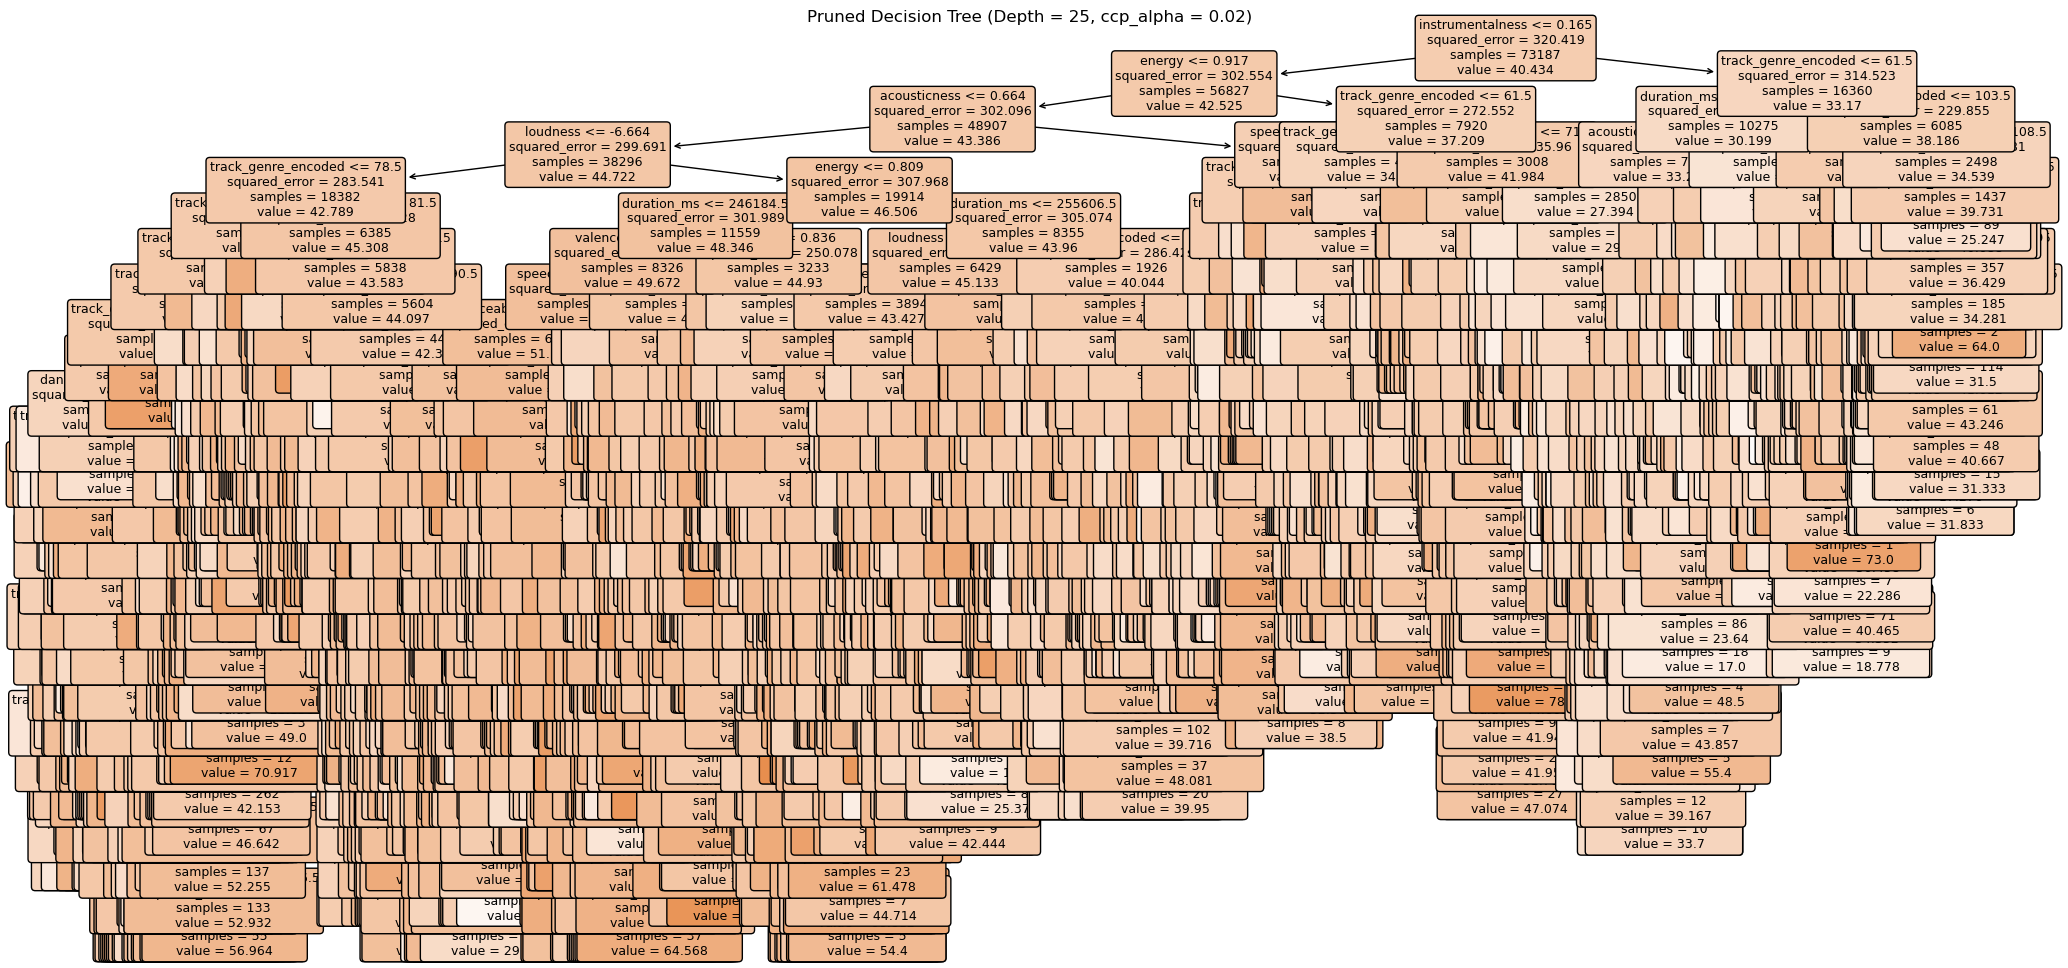

In [ ]:
# Regular Decision Tree with Pruning

import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned_Dataset.csv")

# Convert explicit from boolean to int
df['explicit'] = df['explicit'].astype(int)

# Encode track_genre
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded'
]

X = df[features]
y = df['popularity']

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for max_depth + ccp_alpha
param_grid = {
    'max_depth': [8, 10, 12, 25],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.02]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

# Predictions and evaluation
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

plt.figure(figsize=(24, 12))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=9)
plt.title(f"Pruned Decision Tree (Depth = {grid_search.best_params_['max_depth']}, "
          f"ccp_alpha = {grid_search.best_params_['ccp_alpha']})")
plt.show()

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Train R^2: 0.8632226189706965
Test R^2: 0.6105711458413701
Test MSE: 124.23717288687975


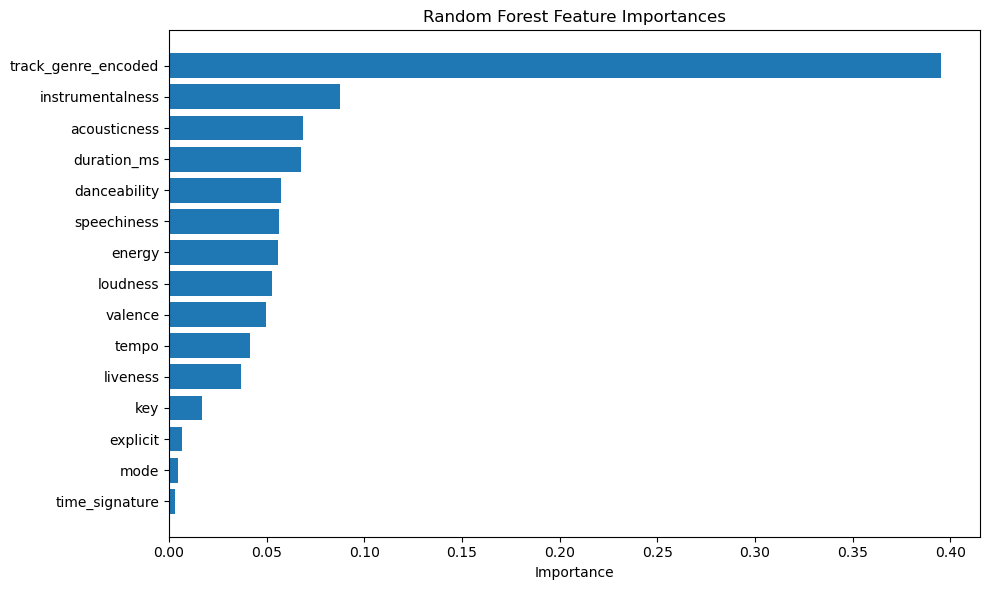

In [ ]:
# Random Forest

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Cleaned_Dataset.csv")

# Convert explicit from boolean to int
df['explicit'] = df['explicit'].astype(int)

# Encode track_genre
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded'
]

X = df[features]
y = df['popularity']

# Use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

# Feature Importance Plot
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 200}
Train R^2: 0.8800929895443297
Test R^2: 0.6675232552774494
Test MSE: 106.06807989152475


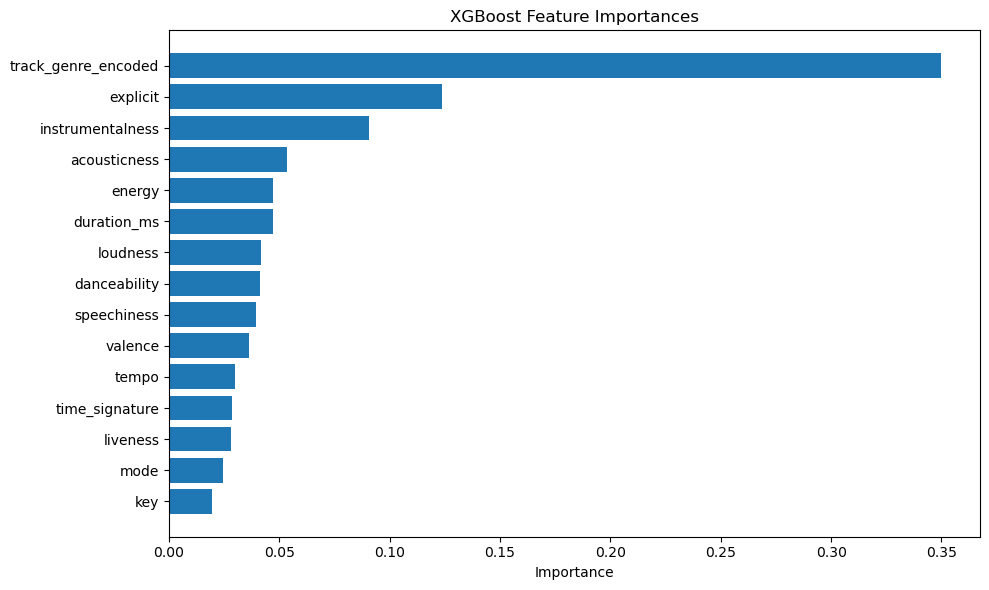

In [ ]:
# XGBoost with Grid Search

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Cleaned_Dataset.csv")

# Converts explicit from boolean to int
df['explicit'] = df['explicit'].astype(int)

# Encode track_genre
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded'
]

X = df[features]
y = df['popularity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Grid search for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.05, 0.1],
    'min_child_weight': [1, 5]
}

grid_search = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

# Feature Importance Plot
importances = best_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.0849080237694725, 'max_depth': 13, 'min_child_weight': 8, 'n_estimators': 288}
Train R^2: 0.969118027421561
Test R^2: 0.6773793421025912
Test MSE: 102.92375108844008


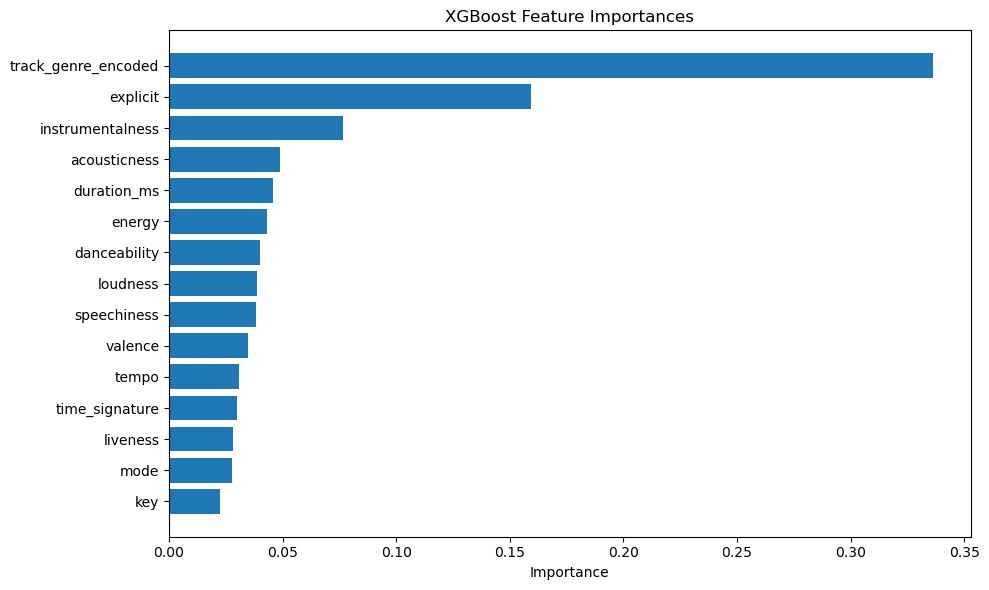

In [2]:
# XGBoost with Random Search

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import randint, uniform

df = pd.read_csv("Cleaned_Dataset.csv")

# Converts explicit from boolean to int
df['explicit'] = df['explicit'].astype(int)

# Encode track_genre
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded'
]

X = df[features]
y = df['popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Randomized search parameter space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'min_child_weight': randint(1, 10)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter combinations to try
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

importances = best_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()